/Users/dhaval/.pyenv/versions/agentic/lib/python3.11/site-packages/risk_atlas_nexus/toolkit/job_utils.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


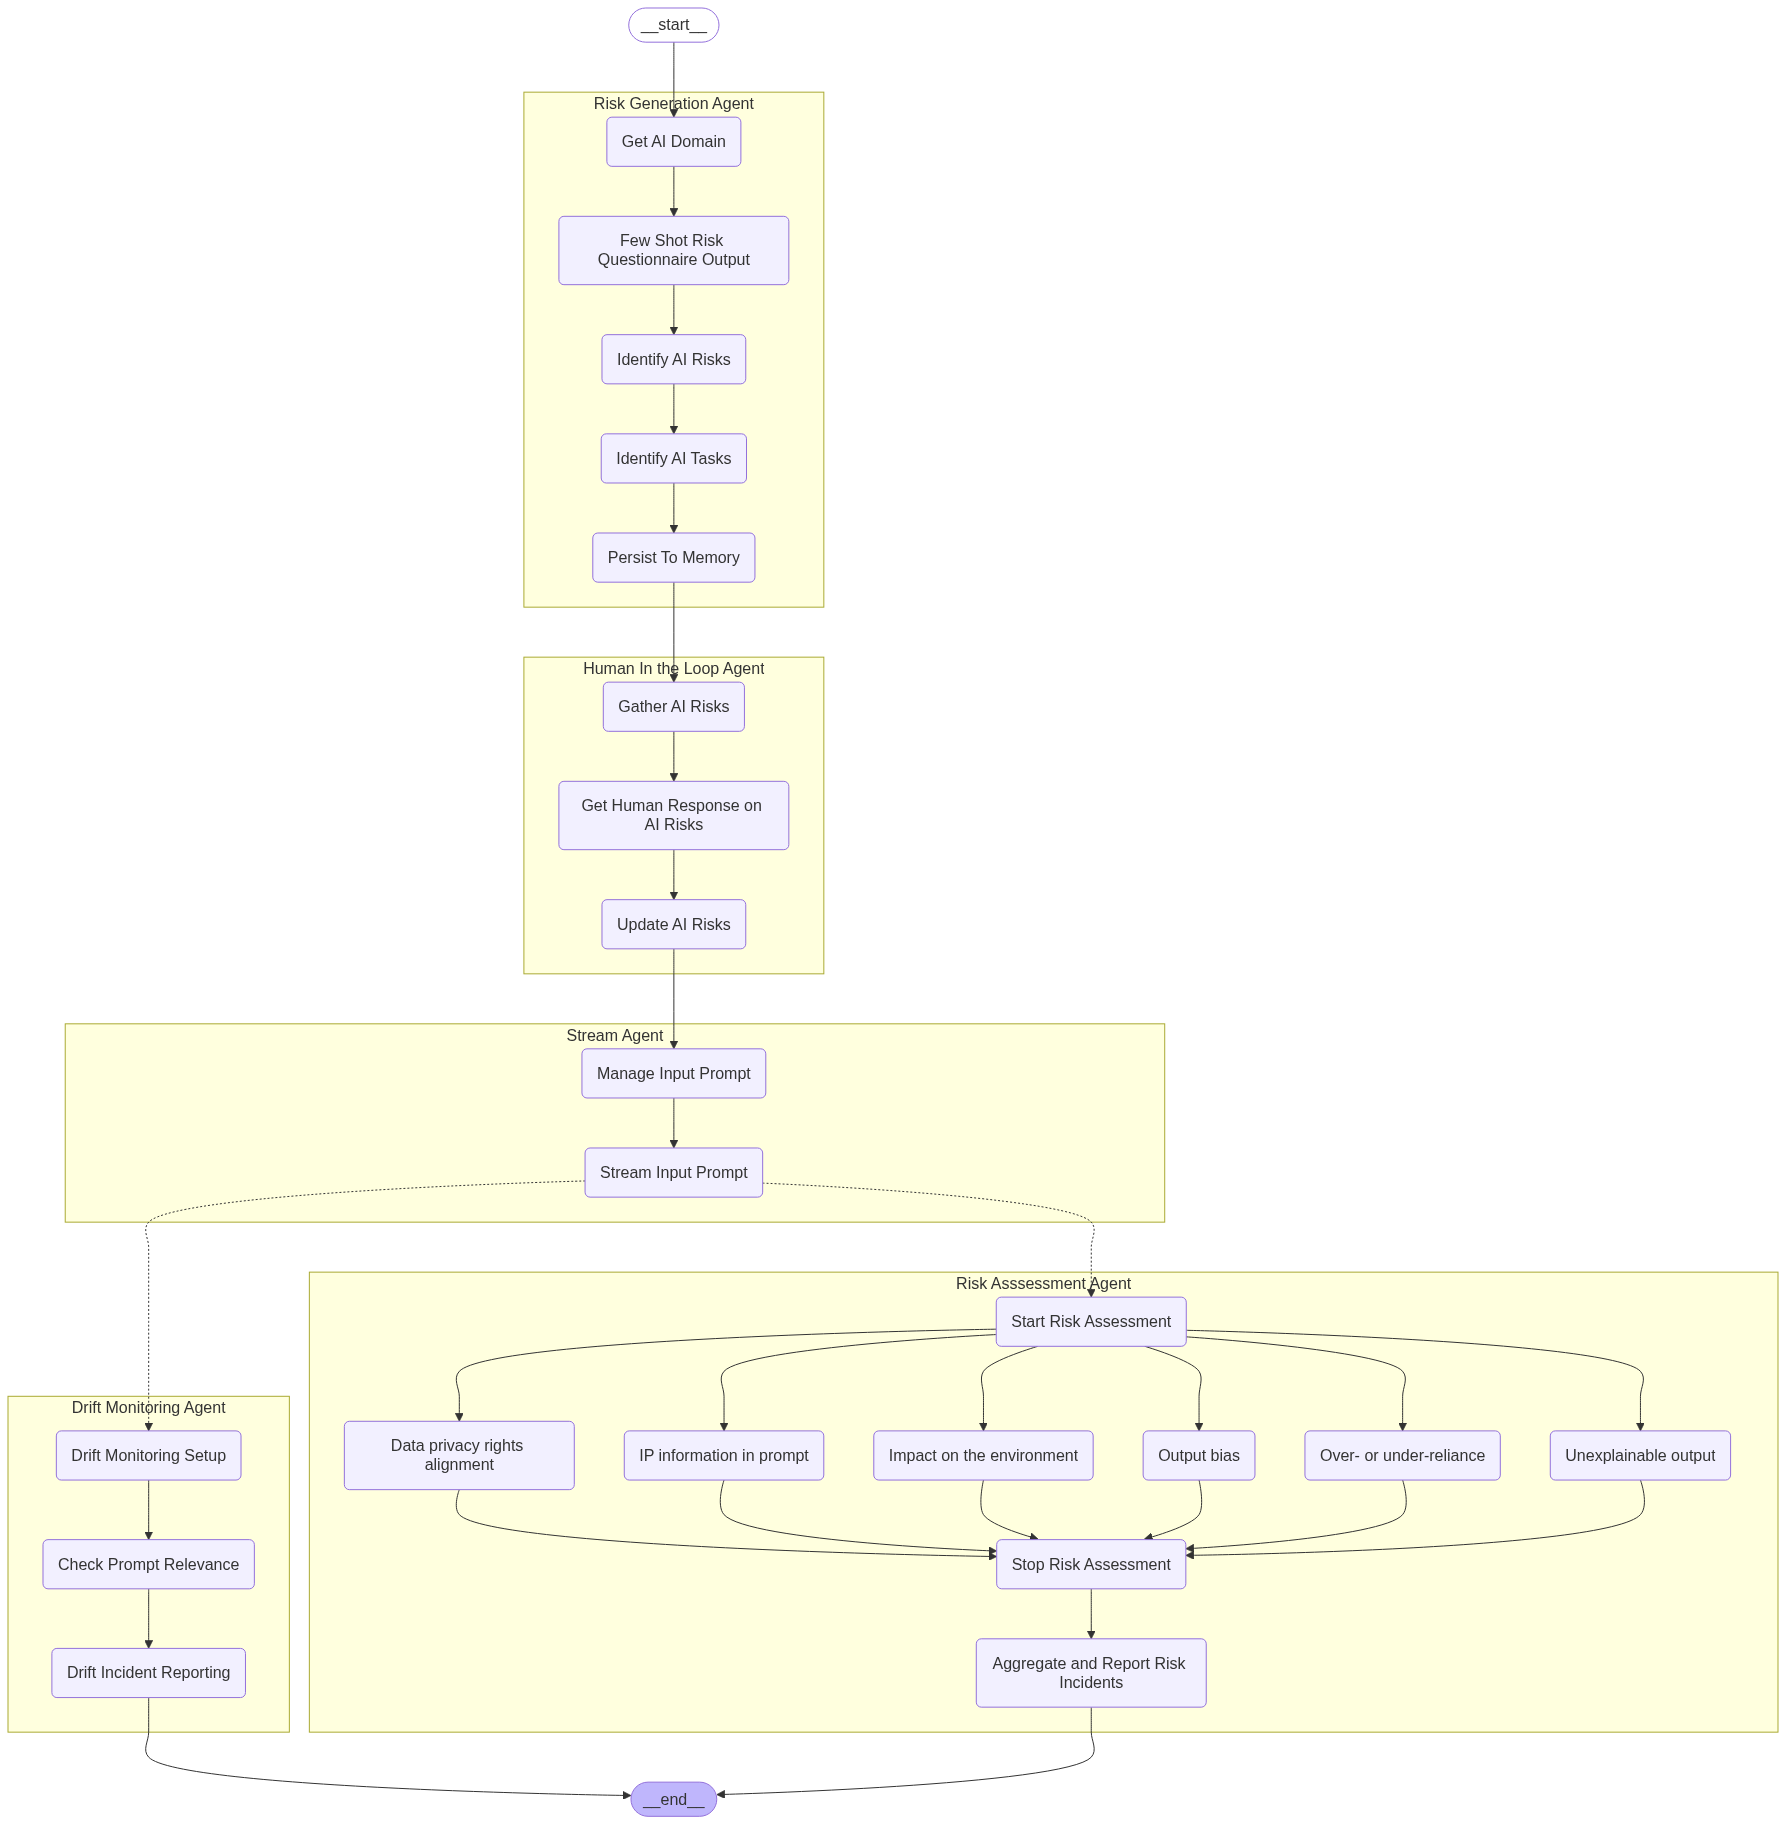

In [1]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from agentic_governance.agents import (
    OrchestratorAgent,
    RiskGeneratorAgent,
    RisksAssessmentAgent,
    DriftMonitorAgent,
    HumanInTheLoopAgent,
    StreamAgent,
)
from langchain_core.runnables.graph import CurveStyle

risk_generator = RiskGeneratorAgent()
risk_generator.compile(MemorySaver(), inference_engine=None)
hitl = HumanInTheLoopAgent()
hitl.compile(MemorySaver(), inference_engine=None)
stream = StreamAgent()
stream.compile(MemorySaver(), inference_engine=None)
risk_assessor = RisksAssessmentAgent()
risk_assessor.compile(MemorySaver(), inference_engine=None)
drift_monitor = DriftMonitorAgent()
drift_monitor.compile(MemorySaver(), inference_engine=None)

agent = OrchestratorAgent()
agent.compile(
    MemorySaver(), agents=[risk_generator, hitl, stream, risk_assessor, drift_monitor]
)

display(
    Image(
        agent.workflow.get_graph(xray=3).draw_mermaid_png(
            curve_style=CurveStyle.CATMULL_ROM, wrap_label_n_words=20
        )
    )
)